In [1]:
import pandas as pd
from collections import Counter

In [2]:
c = pd.read_pickle('noparks.pkl')

In [3]:
acs = pd.read_pickle('acs.pkl')

In [5]:
c.dropna(subset=['ntacode'], inplace=True)

In [6]:
len(set(c.ntacode))

189

In [7]:
categories = c[['category', 'ntacode']]

In [8]:
categories.head()

,category,ntacode
0,blocked driveway,QN55
1,blocked driveway,BX44
2,noise - street/sidewalk,MN04
3,noise - vehicle,BX30
4,illegal parking,QN53


In [9]:
ntacat = c.groupby(['ntacode', 'category'])['category'].count()

In [10]:
ntacat

ntacode  category                               
BK09     adopt-a-basket                                1
         air quality                                  37
         animal abuse                                 16
         appliance                                     2
         asbestos                                      3
         beach/pool/sauna complaint                    1
         best/site safety                              2
         bike/roller/skate chronic                     6
         blocked driveway                             75
         boilers                                       2
         broken muni meter                           267
         building/use                                 13
         city vehicle placard complaint                2
         collection truck noise                        1
         construction                                  2
         consumer complaint                           48
         cranes and derricks           

In [11]:
neighborhoods = ntacat.unstack(level=-1).reset_index().fillna(0)

In [12]:
neighborhoods.head()

category,ntacode,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
0,BK09,1.0,0.0,37.0,16.0,0.0,0.0,2.0,3.0,1.0,...,0.0,1.0,42.0,0.0,4.0,30.0,1.0,137.0,0.0,0.0
1,BK17,0.0,0.0,54.0,88.0,1.0,3.0,25.0,21.0,5.0,...,0.0,9.0,2.0,2.0,37.0,121.0,4.0,723.0,0.0,0.0
2,BK19,1.0,0.0,26.0,57.0,0.0,2.0,28.0,3.0,2.0,...,0.0,8.0,18.0,1.0,18.0,158.0,3.0,194.0,0.0,0.0
3,BK21,0.0,0.0,21.0,43.0,0.0,2.0,62.0,15.0,4.0,...,0.0,10.0,9.0,1.0,25.0,85.0,2.0,255.0,0.0,0.0
4,BK23,0.0,0.0,7.0,9.0,0.0,1.0,6.0,2.0,0.0,...,0.0,1.0,11.0,0.0,2.0,25.0,2.0,55.0,0.0,0.0


In [13]:
neighborhoods.sort_values(by='ntacode')

category,ntacode,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
0,BK09,1.0,0.0,37.0,16.0,0.0,0.0,2.0,3.0,1.0,...,0.0,1.0,42.0,0.0,4.0,30.0,1.0,137.0,0.0,0.0
1,BK17,0.0,0.0,54.0,88.0,1.0,3.0,25.0,21.0,5.0,...,0.0,9.0,2.0,2.0,37.0,121.0,4.0,723.0,0.0,0.0
2,BK19,1.0,0.0,26.0,57.0,0.0,2.0,28.0,3.0,2.0,...,0.0,8.0,18.0,1.0,18.0,158.0,3.0,194.0,0.0,0.0
3,BK21,0.0,0.0,21.0,43.0,0.0,2.0,62.0,15.0,4.0,...,0.0,10.0,9.0,1.0,25.0,85.0,2.0,255.0,0.0,0.0
4,BK23,0.0,0.0,7.0,9.0,0.0,1.0,6.0,2.0,0.0,...,0.0,1.0,11.0,0.0,2.0,25.0,2.0,55.0,0.0,0.0
5,BK25,0.0,0.0,40.0,34.0,1.0,4.0,24.0,3.0,1.0,...,0.0,4.0,2.0,2.0,24.0,175.0,2.0,304.0,0.0,0.0
6,BK26,0.0,0.0,17.0,44.0,0.0,1.0,12.0,1.0,0.0,...,0.0,0.0,7.0,3.0,17.0,43.0,3.0,195.0,0.0,0.0
7,BK27,0.0,0.0,21.0,53.0,0.0,1.0,30.0,6.0,0.0,...,0.0,0.0,3.0,2.0,20.0,52.0,4.0,264.0,0.0,0.0
8,BK28,0.0,0.0,45.0,86.0,1.0,1.0,59.0,21.0,0.0,...,0.0,5.0,22.0,6.0,36.0,191.0,8.0,582.0,2.0,0.0
9,BK29,1.0,0.0,27.0,61.0,0.0,3.0,27.0,11.0,0.0,...,0.0,2.0,7.0,3.0,30.0,139.0,5.0,315.0,0.0,0.0


In [14]:
acs.columns

Index([u'GeogName', u'GeoID', u'MaleP', u'MdAgeE', u'Pop18plE', u'WtNHP',
       u'CvLFUEmP', u'Inc_SNAPP', u'FamBwPvP', u'HUE', u'VacHUP', u'BltBf39P',
       u'ROcHUP', u'MdGRE', u'HHE', u'FamP', u'SmHsP', u'NtvP'],
      dtype='object')

In [15]:
population = acs[['GeoID', 'Pop18plE']]

In [16]:
neighborhoods.drop(neighborhoods[neighborhoods.ntacode == 'QN98'].index, inplace=True)

In [17]:
len(neighborhoods)

188

In [18]:
population.columns = ['nta', 'population']

In [19]:
population = population.sort_values(by = 'nta')

In [20]:
len(population)

188

In [21]:
neighborhoods.ntacode.values == population.nta.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
population['population'] = population['population'].str.replace(',','').astype(int)

In [23]:
population.drop('nta', axis=1, inplace=True)

In [24]:
complaintcounts = neighborhoods.drop('ntacode', axis=1)

In [25]:
weighted = pd.DataFrame(complaintcounts.values/population.values, columns=complaintcounts.columns, index=complaintcounts.index)

In [215]:
weighted.head()

category,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,best/site safety,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
0,0.000048,0.0,0.001792,0.000775,0.00000,0.000000,0.000097,0.000145,0.000048,0.000097,...,0.0,0.000048,0.002034,0.000000,0.000194,0.001453,0.000048,0.006636,0.0,0.0
1,0.000000,0.0,0.001056,0.001721,0.00002,0.000059,0.000489,0.000411,0.000098,0.000098,...,0.0,0.000176,0.000039,0.000039,0.000723,0.002366,0.000078,0.014136,0.0,0.0
2,0.000037,0.0,0.000970,0.002126,0.00000,0.000075,0.001044,0.000112,0.000075,0.000037,...,0.0,0.000298,0.000671,0.000037,0.000671,0.005893,0.000112,0.007235,0.0,0.0
3,0.000000,0.0,0.000934,0.001912,0.00000,0.000089,0.002757,0.000667,0.000178,0.000133,...,0.0,0.000445,0.000400,0.000044,0.001112,0.003779,0.000089,0.011337,0.0,0.0
4,0.000000,0.0,0.000503,0.000647,0.00000,0.000072,0.000431,0.000144,0.000000,0.000000,...,0.0,0.000072,0.000791,0.000000,0.000144,0.001798,0.000144,0.003955,0.0,0.0


In [27]:
weighted_norm = (weighted - weighted.mean()) / (weighted.max() - weighted.min())

In [216]:
weighted.to_csv('weighted.csv')

#### SVD

In [28]:
for_svd = weighted_norm.as_matrix()

In [29]:
import sklearn

In [30]:
from sklearn.utils.extmath import randomized_svd

In [31]:
U, Sigma, VT = randomized_svd(for_svd, n_components=20, n_iter=5, random_state=None)

In [32]:
Sigma

array([ 12.32191167,   8.78986104,   7.23002981,   5.2810704 ,
         4.8363843 ,   3.96021462,   3.69880584,   3.65900133,
         3.55721713,   3.37134241,   3.28126783,   3.09213106,
         3.03273568,   2.96890225,   2.89878121,   2.84347021,
         2.78867332,   2.73808733,   2.6118709 ,   2.60605525])

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
x = range(len(Sigma))

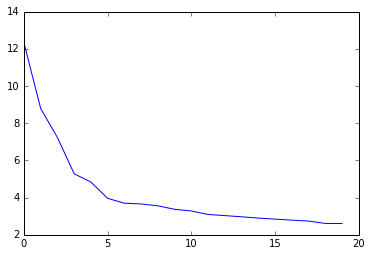

In [35]:
plt.plot(x, Sigma)

#### NMF

In [224]:
from sklearn.decomposition import NMF

In [37]:
for_nmf = weighted.as_matrix()

In [230]:
weighted

category,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,best/site safety,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
0,0.000048,0.0,0.001792,0.000775,0.000000,0.000000,0.000097,0.000145,0.000048,0.000097,...,0.000000,0.000048,0.002034,0.000000,0.000194,0.001453,0.000048,0.006636,0.000000,0.0
1,0.000000,0.0,0.001056,0.001721,0.000020,0.000059,0.000489,0.000411,0.000098,0.000098,...,0.000000,0.000176,0.000039,0.000039,0.000723,0.002366,0.000078,0.014136,0.000000,0.0
2,0.000037,0.0,0.000970,0.002126,0.000000,0.000075,0.001044,0.000112,0.000075,0.000037,...,0.000000,0.000298,0.000671,0.000037,0.000671,0.005893,0.000112,0.007235,0.000000,0.0
3,0.000000,0.0,0.000934,0.001912,0.000000,0.000089,0.002757,0.000667,0.000178,0.000133,...,0.000000,0.000445,0.000400,0.000044,0.001112,0.003779,0.000089,0.011337,0.000000,0.0
4,0.000000,0.0,0.000503,0.000647,0.000000,0.000072,0.000431,0.000144,0.000000,0.000000,...,0.000000,0.000072,0.000791,0.000000,0.000144,0.001798,0.000144,0.003955,0.000000,0.0
5,0.000000,0.0,0.001246,0.001059,0.000031,0.000125,0.000748,0.000093,0.000031,0.000093,...,0.000000,0.000125,0.000062,0.000062,0.000748,0.005451,0.000062,0.009469,0.000000,0.0
6,0.000000,0.0,0.000739,0.001914,0.000000,0.000043,0.000522,0.000043,0.000000,0.000043,...,0.000000,0.000000,0.000304,0.000130,0.000739,0.001870,0.000130,0.008481,0.000000,0.0
7,0.000000,0.0,0.000885,0.002234,0.000000,0.000042,0.001264,0.000253,0.000000,0.000042,...,0.000000,0.000000,0.000126,0.000084,0.000843,0.002192,0.000169,0.011126,0.000000,0.0
8,0.000000,0.0,0.000639,0.001221,0.000014,0.000014,0.000838,0.000298,0.000000,0.000085,...,0.000000,0.000071,0.000312,0.000085,0.000511,0.002712,0.000114,0.008264,0.000028,0.0
9,0.000020,0.0,0.000551,0.001245,0.000000,0.000061,0.000551,0.000225,0.000000,0.000041,...,0.000000,0.000041,0.000143,0.000061,0.000612,0.002837,0.000102,0.006430,0.000000,0.0


In [231]:
model = NMF(n_components=5, init='random', random_state=0)
complaint_clusters = model.fit_transform(for_nmf)

In [232]:
category = weighted.columns.values

In [233]:
complaints = []
for r in model.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:5]
    complaints.append([category[e[1]] for e in a])

In [234]:
complaints

[['blocked driveway',
  'illegal parking',
  'noise - residential',
  'derelict vehicle',
  'building/use'],
 ['street condition',
  'street light condition',
  'illegal parking',
  'water system',
  'missed collection (all materials)'],
 ['noise',
  'street condition',
  'noise - commercial',
  'taxi complaint',
  'broken muni meter'],
 ['heat/hot water',
  'paint/plaster',
  'unsanitary condition',
  'noise - residential',
  'plumbing'],
 ['noise - residential',
  'noise - street/sidewalk',
  'unsanitary condition',
  'noise - commercial',
  'water system']]

In [42]:
nbcluster = [list(r).index(max(r)) for r in complaint_clusters]

In [43]:
nbcc = pd.DataFrame([neighborhoods.ntacode.values, nbcluster]).T

nbcc.columns=['NTACode', 'cluster']

nbcc.to_csv('nbcc.csv')

nbcc.groupby('cluster').count().reset_index()

In [285]:
word_cluster = [(list(r).index(max(r)),max(r)) for r in model.components_.transpose()]
for i,r in enumerate(model.components_.transpose()):
   s = sorted(r)
   if (s[0]-s[1])/s[1]<0.25:
       word_cluster[i] = (-1,-1)

In [290]:
topic_words = []
for c in range(5):
   a = sorted([(v[1],i) for i,v in enumerate(word_cluster) if v[0]==c],reverse=True)[0:5]
   topic_words.append([category[e[1]] for e in a])

In [291]:
topic_words

[['derelict vehicle',
  'building/use',
  'construction',
  'curb condition',
  'sweeping/missed'],
 ['missed collection (all materials)',
  'damaged tree',
  'overgrown tree/branches',
  'root/sewer/sidewalk condition',
  'water conservation'],
 ['noise - commercial',
  'taxi complaint',
  'fire safety director - f58',
  'noise - street/sidewalk',
  'homeless person assistance'],
 ['heat/hot water',
  'paint/plaster',
  'flooring/stairs',
  'elevator',
  'appliance'],
 ['agency']]

In [294]:
model4 = NMF(n_components=4, init='random', random_state=0)
complaint_clusters4 = model4.fit_transform(for_nmf)

In [295]:
word_cluster = [(list(r).index(max(r)),max(r)) for r in model4.components_.transpose()]
for i,r in enumerate(model4.components_.transpose()):
   s = sorted(r)
   if (s[0]-s[1])/s[1]<0.25:
       word_cluster[i] = (-1,-1)

In [298]:
topic_words = []
for c in range(4):
   a = sorted([(v[1],i) for i,v in enumerate(word_cluster) if v[0]==c],reverse=True)[0:5]
   topic_words.append([category[e[1]] for e in a])

In [299]:
topic_words

[['derelict vehicle', 'building/use', 'construction', 'laboratory'],
 ['street condition',
  'missed collection (all materials)',
  'overgrown tree/branches',
  'root/sewer/sidewalk condition',
  'dead tree'],
 ['taxi complaint',
  'fire safety director - f58',
  'homeless person assistance',
  'vending',
  'homeless encampment'],
 ['paint/plaster',
  'standpipe - mechanical',
  'agency',
  'gas station discharge lines']]

In [300]:
nbcluster4 = [list(r).index(max(r)) for r in complaint_clusters4]

In [301]:
nb4 = pd.DataFrame([neighborhoods.ntacode.values, nbcluster4]).T
nb4.columns=['NTACode', 'cluster']
nb4.to_csv('nb4.csv')
nb4.groupby('cluster').count().reset_index()

,cluster,NTACode
0,0,16
1,1,87
2,2,22
3,3,63


#### no noise nmf

In [217]:
noise = ['noise - residential', 'noise - commercial' , 'noise', 'noise - street/sidewalk']

In [218]:
repeats = ['street condition', 'unsanitary condition']

In [219]:
no_noise = weighted.drop(noise, axis=1)

In [220]:
nn_cats = weighted.columns.values

In [221]:
no_noise = no_noise.as_matrix()

In [239]:
nnmodel = NMF(n_components=5, init='random', random_state=0)
nncomplaint_clusters = nnmodel.fit_transform(no_noise)

In [242]:
nncomplaints = []
for r in nnmodel.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:5]
    nncomplaints.append([nn_cats[e[1]] for e in a])

In [243]:
nncomplaints

[['blocked driveway',
  'illegal parking',
  'derelict vehicle',
  'building/use',
  'stalled sites'],
 ['heat/hot water',
  'transportation provider complaint',
  'outside building',
  'overgrown tree/branches',
  'door/window'],
 ['srde',
  'stalled sites',
  'illegal parking',
  'violation of park rules',
  'missed collection (all materials)'],
 ['srde',
  'sweeping/inadequate',
  'broken muni meter',
  'fire safety director - f58',
  'illegal parking'],
 ['heat/hot water',
  'outside building',
  'illegal parking',
  'srde',
  'overgrown tree/branches']]

In [318]:
nnword_cluster = [(list(r).index(max(r)),max(r)) for r in nnmodel.components_.transpose()]
for i,r in enumerate(nnmodel.components_.transpose()):
   s = sorted(r)
   if (s[0]-s[1])/s[1]<1:
       nnword_cluster[i] = (-1,-1)

In [319]:
nntopic_words = []
for c in range(5):
   a = sorted([(v[1],i) for i,v in enumerate(nnword_cluster) if v[0]==c],reverse=True)[0:5]
   nntopic_words.append([nn_cats[e[1]] for e in a])

In [321]:
nnword_cluster

[(-1, -1),
 (2, 9.5652672794949172e-06),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (4, 0.028444893281923452),
 (-1, -1),
 (2, 0.002490289938339526),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (0, 0.59466033552946218),
 (-1, -1),
 (2, 0.00014632103318331461),
 (-1, -1),
 (-1, -1),
 (2, 8.2483622796320303e-06),
 (-1, -1),
 (-1, -1),
 (3, 9.1840346354915575e-05),
 (-1, -1),
 (-1, -1),
 (2, 0.043127322095146595),
 (-1, -1),
 (3, 0.0011818533315869793),
 (-1, -1),
 (2, 0.22202106818190034),
 (2, 0.00019527579093472631),
 (-1, -1),
 (-1, -1),
 (2, 0.28493341456112836),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (3, 0.014212567098819094),
 (-1, -1),
 (-1, -1),
 (4, 0.12455896567962001),
 (-1, -1),
 (3, 0.0038572067728109847),
 (3, 0.061835898138992984),
 (4, 0.088988100877759241),
 (4, 8.9011718255556951e-05),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (0, 5.1148886459684993e-06),
 (3, 0.0018106418718286687),
 (1, 4.0153810575543237e-06),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 

In [320]:
nntopic_words

[['blocked driveway',
  'standpipe - mechanical',
  'plant',
  'posting advertisement',
  'forensic engineering'],
 ['taxi complaint', 'gas station discharge lines'],
 ['missed collection (all materials)',
  'derelict vehicle',
  'damaged tree',
  'other enforcement',
  'radioactive material'],
 ['sweeping/inadequate',
  'fire safety director - f58',
  'homeless person assistance',
  'unsanitary pigeon condition',
  'homeless encampment'],
 ['heat/hot water',
  'outside building',
  'elevator',
  'flooring/stairs',
  'appliance']]

#### PCA

In [47]:
from sklearn.decomposition import PCA

In [140]:
pca = PCA(n_components=10)
pca.fit_transform(for_svd)

array([[-0.30503261,  0.76086074, -0.69348337, ...,  0.30253326,
        -0.31466571,  0.36704851],
       [-0.62616956, -0.05739465, -0.03512203, ..., -0.06570992,
        -0.00202604, -0.04312178],
       [ 0.13938931,  0.17525205, -0.05288882, ..., -0.36496243,
         0.63568206,  0.60455999],
       ..., 
       [-1.40314939, -0.18747321,  1.15108944, ...,  0.12617301,
        -0.27002234,  0.38643129],
       [-1.17707039, -0.49761609,  0.21284381, ..., -0.21925507,
         0.51114128, -0.12257814],
       [-1.30287353, -0.29762751,  0.59309715, ..., -0.13256371,
         0.51027066, -0.188328  ]])

In [141]:
pca.explained_variance_ratio_

array([ 0.22103218,  0.1124769 ,  0.0760991 ,  0.04060161,  0.03405187,
        0.02283164,  0.01991706,  0.01949127,  0.01842134,  0.01654708])

In [142]:
pcacomplaints = []
for r in pca.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:7]
    pcacomplaints.append([category[e[1]] for e in a])

In [143]:
pcacomplaints

[['electric',
  'door/window',
  'plumbing',
  'unsanitary condition',
  'heat/hot water',
  'appliance',
  'water leak'],
 ['noise',
  'best/site safety',
  'noise - commercial',
  'derelict bicycle',
  'air quality',
  'sidewalk condition',
  'emergency response team (ert)'],
 ['sanitation condition',
  'water conservation',
  'dirty conditions',
  'overgrown tree/branches',
  'sewer',
  'water system',
  'street condition'],
 ['beach/pool/sauna complaint',
  'street condition',
  'elevator',
  'water conservation',
  'animal in a park',
  'maintenance or facility',
  'standing water'],
 ['illegal tree damage',
  'lead',
  'derelict bicycle',
  'maintenance or facility',
  'litter basket / request',
  'water quality',
  'illegal fireworks'],
 ['construction',
  'special enforcement',
  'blocked driveway',
  'noise - residential',
  'noise - street/sidewalk',
  'illegal tree damage',
  'noise - vehicle'],
 ['illegal fireworks',
  'noise - commercial',
  'building/use',
  'literature r

In [52]:
pd.DataFrame(pca.components_,columns=weighted.columns,index = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

category,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,best/site safety,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
pc1,0.018340,0.007411,-0.001117,0.016697,-0.023521,-0.013440,0.228823,0.020385,-0.061738,0.006020,...,-0.000255,-0.022874,0.004827,0.024294,-0.093673,0.228543,-0.022970,-0.013532,0.022777,0.003091
pc2,0.015856,-0.003100,0.170336,0.031872,0.002885,0.027431,-0.083350,0.132454,0.039445,0.201199,...,0.014605,-0.069075,0.095929,0.078407,-0.085433,-0.069942,0.027484,0.026816,0.003690,0.067336
pc3,0.052535,0.015429,0.023125,0.143647,0.017361,0.080815,0.118018,0.048938,0.085064,0.040210,...,0.002021,0.181772,0.012119,-0.003313,0.216116,0.113316,0.070627,0.186826,-0.009888,0.002305
pc4,-0.042852,0.002212,-0.004868,0.036342,-0.008208,0.108339,0.039321,0.011504,0.159360,-0.114789,...,-0.008636,0.043552,0.053807,0.093542,0.115407,-0.001886,0.066494,0.069932,-0.057038,0.050991
pc5,0.073861,-0.007527,-0.005810,-0.125196,0.070564,0.118900,-0.009454,-0.011577,0.037565,0.018407,...,-0.024356,-0.026677,-0.101475,-0.071616,-0.047549,0.003325,0.128930,-0.035812,-0.034864,-0.133912


#### K-means with NMF

In [181]:
nmf20 = NMF(n_components=20, init='random', random_state=0)
nmfvectors = nmf20.fit_transform(for_nmf)

In [54]:
from sklearn.cluster import KMeans

In [193]:
kmeansnmf = KMeans(n_clusters=5, n_init=1000)

In [194]:
kmeansnmf_clusters = kmeansnmf.fit_predict(nmfvectors)

In [195]:
kmeansnmf_clusters

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 4, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 1,
       2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 2, 0, 4, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 4, 4, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0], dtype=int32)

In [196]:
knmf = pd.DataFrame([neighborhoods.ntacode.values, kmeansnmf_clusters]).T

In [197]:
knmf.columns=['nta','knmfcluster']

In [198]:
knmf.groupby('knmfcluster')['nta'].count()

knmfcluster
0    107
1     26
2     42
3      2
4     11
Name: nta, dtype: int64

In [61]:
knmf.to_csv('knmf.csv')

#### kmeans

In [172]:
kmeans = KMeans(n_clusters=4, n_init=1000)

In [173]:
kmeans_clusters = kmeans.fit_predict(for_svd)

In [174]:
km = pd.DataFrame([neighborhoods.ntacode.values, kmeans_clusters]).T

In [175]:
km.columns = ['nta', 'km']

In [176]:
km.groupby('km')['nta'].count()

km
0    44
1    24
2    50
3    70
Name: nta, dtype: int64

In [177]:
for i in kmeans.cluster_centers_:
    print sorted(zip(i, category), reverse=True)[0:5]

[(0.40377094323502427, 'electric'), (0.38319131259600547, 'door/window'), (0.36618550269681394, 'plumbing'), (0.35652068733026471, 'water leak'), (0.35545477955357896, 'unsanitary condition')]
[(0.37356908613208145, 'derelict bicycle'), (0.30351198159170878, 'best/site safety'), (0.2866205695147635, 'noise'), (0.28257677580652751, 'noise - commercial'), (0.25193972817780391, 'lead')]
[(0.27221244585866999, 'root/sewer/sidewalk condition'), (0.25667670358904676, 'overgrown tree/branches'), (0.22206230536867649, 'damaged tree'), (0.22160281039683119, 'dead tree'), (0.21903156956013073, 'sewer')]
[(0.08758051370661897, 'sweeping/inadequate'), (0.085862660820908501, 'blocked driveway'), (0.073493547254907671, 'sweeping/missed'), (0.026098948555289627, 'curb condition'), (0.021919202644427874, 'foam ban enforcement')]


In [67]:
km.to_csv('km.csv')

##### km5

In [250]:
kmeans5 = KMeans(n_clusters=5, n_init=1000)

In [251]:
km5_clusters = kmeans5.fit_predict(for_svd)

In [255]:
km5 = pd.DataFrame([neighborhoods.ntacode.values, km5_clusters]).T

In [256]:
km5.columns = ['nta', 'km5']

In [257]:
km5.groupby('km5')['nta'].count()

km5
0    70
1    45
2     1
3    26
4    46
Name: nta, dtype: int64

#### cosine

In [145]:
from sklearn.cluster import AgglomerativeClustering

In [206]:
aggmodel = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')

In [207]:
agg_clusters = aggmodel.fit_predict(nmfvectors)

In [208]:
agg_clusters

array([0, 4, 3, 0, 3, 3, 4, 3, 3, 3, 0, 3, 0, 2, 3, 3, 0, 0, 2, 3, 3, 3, 3,
       4, 3, 4, 4, 3, 3, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0,
       3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 3,
       4, 4, 4, 2, 3, 4, 1, 3, 3, 3, 1, 4, 0, 4, 1, 4, 1, 0, 0, 0, 3, 4, 0,
       4, 4, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 4, 2, 0,
       0, 2, 1, 4, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0,
       0, 0, 2, 2])

In [209]:
agg = pd.DataFrame([neighborhoods.ntacode.values, agg_clusters]).T

In [210]:
agg.columns=['nta','aggcluster']

In [211]:
agg.groupby('aggcluster')['nta'].count()

aggcluster
0    54
1    24
2    33
3    60
4    17
Name: nta, dtype: int64

In [212]:
agg.to_csv('agg1.csv')

In [269]:
aggmodel4 = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')

In [270]:
agg4_clusters = aggmodel4.fit_predict(nmfvectors)

In [271]:
agg4 = pd.DataFrame([neighborhoods.ntacode.values, agg4_clusters]).T

In [272]:
agg4.columns=['nta', 'aggcluster']

In [273]:
agg4.groupby('aggcluster')['nta'].count()

aggcluster
0    139
1      2
2     43
3      4
Name: nta, dtype: int64

In [274]:
agg4.to_csv('agg4avg.csv')

#### counts, rates,

In [68]:
neighborhoods.head()

category,ntacode,adopt-a-basket,agency,air quality,animal abuse,animal facility - no permit,animal in a park,appliance,asbestos,beach/pool/sauna complaint,...,vacant apartment,vacant lot,vending,violation of park rules,water conservation,water leak,water quality,water system,window guard,x-ray machine/equipment
0,BK09,1.0,0.0,37.0,16.0,0.0,0.0,2.0,3.0,1.0,...,0.0,1.0,42.0,0.0,4.0,30.0,1.0,137.0,0.0,0.0
1,BK17,0.0,0.0,54.0,88.0,1.0,3.0,25.0,21.0,5.0,...,0.0,9.0,2.0,2.0,37.0,121.0,4.0,723.0,0.0,0.0
2,BK19,1.0,0.0,26.0,57.0,0.0,2.0,28.0,3.0,2.0,...,0.0,8.0,18.0,1.0,18.0,158.0,3.0,194.0,0.0,0.0
3,BK21,0.0,0.0,21.0,43.0,0.0,2.0,62.0,15.0,4.0,...,0.0,10.0,9.0,1.0,25.0,85.0,2.0,255.0,0.0,0.0
4,BK23,0.0,0.0,7.0,9.0,0.0,1.0,6.0,2.0,0.0,...,0.0,1.0,11.0,0.0,2.0,25.0,2.0,55.0,0.0,0.0


In [69]:
neighborhoods.columns

Index([u'ntacode', u'adopt-a-basket', u'agency', u'air quality',
       u'animal abuse', u'animal facility - no permit', u'animal in a park',
       u'appliance', u'asbestos', u'beach/pool/sauna complaint',
       ...
       u'vacant apartment', u'vacant lot', u'vending',
       u'violation of park rules', u'water conservation', u'water leak',
       u'water quality', u'water system', u'window guard',
       u'x-ray machine/equipment'],
      dtype='object', name=u'category', length=163)

In [70]:
neighborhoods['totals'] = neighborhoods.sum(axis=1)

In [71]:
neighborhoods['population'] = population.population.values

In [72]:
neighborhoods['rate'] = neighborhoods.totals.values/neighborhoods.population.values

In [73]:
neighborhoods.to_csv('nbs.csv')

In [74]:
withnbs = pd.read_csv('nbsrate.csv')

In [75]:
withnbs.sort_values(by='NTACode', inplace=True)

In [137]:
withnbs.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,NEIGHBORS,SUM,NEIGHBOR_1,SUM_1,NEIGHBOR_2,SUM_2,nbs_totals,nbs_population,nbs_rate
70,3,Brooklyn,47,BK09,Brooklyn Heights-Cobble Hill,14253.671345,9.984666e+06,"MN25,BK33,BK38",0.323093,NaN,NaN,NaN,NaN,4650,20645,0.225236
69,3,Brooklyn,47,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,91048.349489,6.334233e+07,"BK25,BK44,BK19",0.290950,NaN,NaN,NaN,NaN,13850,51145,0.270799
103,3,Brooklyn,47,BK19,Brighton Beach,21057.419874,1.717931e+07,"BK25,BK17,BK26,BK21,BK23",0.229194,NaN,NaN,NaN,NaN,8116,26813,0.302689
145,3,Brooklyn,47,BK21,Seagate-Coney Island,51801.298943,3.873465e+07,"BK19,BK26,BK23",0.203771,NaN,NaN,NaN,NaN,6153,22492,0.273564
146,3,Brooklyn,47,BK23,West Brighton,14114.860570,8.739996e+06,"BK19,BK26,BK21",0.267397,NaN,NaN,NaN,NaN,1150,13908,0.082686


In [76]:
len(withnbs)

188

In [77]:
sum(acs.GeoID != withnbs.NTACode)

0

In [78]:
acs['rate'] = withnbs.nbs_rate.values

In [275]:
acs['neighborsrate'] = withnbs.SUM.values

In [278]:
acs.head()

,GeogName,GeoID,MaleP,MdAgeE,Pop18plE,WtNHP,CvLFUEmP,Inc_SNAPP,FamBwPvP,HUE,VacHUP,BltBf39P,ROcHUP,MdGRE,HHE,FamP,SmHsP,NtvP,rate,neighborsrate
0,Brooklyn Heights-Cobble Hill ...,BK09,49.4,36.9,"20,645",76.2,4.7,2.4,2.8,"12,760",12.1,66.7,55.6,"1,893","11,222",42.4,83.0,80.5,0.225236,0.323093
1,Sheepshead Bay-Gerritsen Beach-Manhattan Beac ...,BK17,45.9,43.8,"51,145",69.8,5.4,17.7,13.5,"27,855",8.0,26.4,47.5,"1,077","25,614",65.7,93.7,54.7,0.270799,0.290950
2,Brighton Beach ...,BK19,46.9,44.5,"26,813",69.2,4.2,31.2,20.1,"15,518",9.0,35.5,70.5,"1,043","14,122",56.2,88.4,31.1,0.302689,0.229194
3,Seagate-Coney Island ...,BK21,45.8,42.0,"22,492",30.2,10.2,50.3,28.0,"12,101",10.2,16.3,83.4,619,"10,863",61.7,92.1,64.4,0.273564,0.203771
4,West Brighton ...,BK23,40.8,57.2,"13,908",97.3,4.3,24.9,8.2,"8,641",6.3,4.8,58.7,905,"8,094",53.6,96.8,39.2,0.082686,0.267397


In [124]:
x = acs[acs.columns[2:]]

In [83]:
y = kmeansnmf_clusters

In [84]:
y

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 0, 1, 2, 2, 2, 2, 4, 2, 2, 2, 4, 0, 2,
       4, 0, 4, 4, 4, 2, 4, 4, 4, 4, 0, 2, 0, 4, 4, 0, 4, 4, 4, 0, 3, 0, 4,
       2, 4, 4, 2, 2, 3, 4, 4, 4, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0], dtype=int32)

In [85]:
import statsmodels.api as st

In [96]:
import locale

In [97]:
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [108]:
strings = ['Pop18plE', 'HUE', 'MdGRE', 'HHE']

In [125]:
for s in strings:
    x[s] = x[s].apply(atof)

/home/amn34/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [126]:
x.apply(lambda x: pd.to_numeric(x))

,MaleP,MdAgeE,Pop18plE,WtNHP,CvLFUEmP,Inc_SNAPP,FamBwPvP,HUE,VacHUP,BltBf39P,ROcHUP,MdGRE,HHE,FamP,SmHsP,NtvP,rate,nbrate
0,49.4,36.9,20645.0,76.2,4.7,2.4,2.8,12760.0,12.1,66.7,55.6,1893.0,11222.0,42.4,83.0,80.5,0.225236,0.323093
1,45.9,43.8,51145.0,69.8,5.4,17.7,13.5,27855.0,8.0,26.4,47.5,1077.0,25614.0,65.7,93.7,54.7,0.270799,0.290950
2,46.9,44.5,26813.0,69.2,4.2,31.2,20.1,15518.0,9.0,35.5,70.5,1043.0,14122.0,56.2,88.4,31.1,0.302689,0.229194
3,45.8,42.0,22492.0,30.2,10.2,50.3,28.0,12101.0,10.2,16.3,83.4,619.0,10863.0,61.7,92.1,64.4,0.273564,0.203771
4,40.8,57.2,13908.0,97.3,4.3,24.9,8.2,8641.0,6.3,4.8,58.7,905.0,8094.0,53.6,96.8,39.2,0.082686,0.267397
5,49.2,36.4,32104.0,79.0,5.9,16.5,12.6,16912.0,8.8,42.8,60.0,1173.0,15419.0,68.4,92.3,56.5,0.292985,0.282224
6,46.2,42.5,22993.0,53.8,5.8,28.1,14.8,11632.0,3.4,26.6,65.6,923.0,11232.0,66.5,94.3,51.0,0.225938,0.238177
7,50.8,39.4,23728.0,52.8,4.8,15.7,12.6,11744.0,8.4,37.5,58.2,1159.0,10756.0,69.5,92.2,54.5,0.261505,0.235485
8,48.5,37.8,70429.0,46.1,6.2,20.4,14.9,31892.0,6.2,62.1,65.2,1134.0,29899.0,72.3,92.6,45.0,0.218674,0.239519
9,49.1,39.8,48991.0,48.9,6.1,20.5,13.5,23439.0,7.0,58.5,63.8,1118.0,21794.0,72.5,91.4,42.6,0.238962,0.268878


In [127]:
x = st.add_constant(x)

In [128]:
x.head()

,const,MaleP,MdAgeE,Pop18plE,WtNHP,CvLFUEmP,Inc_SNAPP,FamBwPvP,HUE,VacHUP,BltBf39P,ROcHUP,MdGRE,HHE,FamP,SmHsP,NtvP,rate,nbrate
0,1,49.4,36.9,20645.0,76.2,4.7,2.4,2.8,12760.0,12.1,66.7,55.6,1893.0,11222.0,42.4,83.0,80.5,0.225236,0.323093
1,1,45.9,43.8,51145.0,69.8,5.4,17.7,13.5,27855.0,8.0,26.4,47.5,1077.0,25614.0,65.7,93.7,54.7,0.270799,0.290950
2,1,46.9,44.5,26813.0,69.2,4.2,31.2,20.1,15518.0,9.0,35.5,70.5,1043.0,14122.0,56.2,88.4,31.1,0.302689,0.229194
3,1,45.8,42.0,22492.0,30.2,10.2,50.3,28.0,12101.0,10.2,16.3,83.4,619.0,10863.0,61.7,92.1,64.4,0.273564,0.203771
4,1,40.8,57.2,13908.0,97.3,4.3,24.9,8.2,8641.0,6.3,4.8,58.7,905.0,8094.0,53.6,96.8,39.2,0.082686,0.267397


In [129]:
x = x.as_matrix()

In [130]:
mnlogit = st.MNLogit(y, x)

In [123]:
y

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 0, 1, 2, 2, 2, 2, 4, 2, 2, 2, 4, 0, 2,
       4, 0, 4, 4, 4, 2, 4, 4, 4, 4, 0, 2, 0, 4, 4, 0, 4, 4, 4, 0, 3, 0, 4,
       2, 4, 4, 2, 2, 3, 4, 4, 4, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0], dtype=int32)

In [135]:
mdl_fit = mnlogit.fit(method='bfgs')

         Current function value: nan
         Iterations: 1
         Function evaluations: 42
         Gradient evaluations: 42


/usr/local/lib/python2.7/dist-packages/statsmodels-0.6.1-py2.7-linux-x86_64.egg/statsmodels/base/model.py:443: RuntimeWarning: Inverting hessian failed, no bse or cov_params available
  warn(warndoc, RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels-0.6.1-py2.7-linux-x86_64.egg/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [136]:
mdl_fit.summary()

ValueError: need covariance of parameters for computing (unnormalized) covariances

In [133]:
x

array([[  1.        ,  49.4       ,  36.9       , ...,  80.5       ,
          0.22523613,   0.3230928 ],
       [  1.        ,  45.9       ,  43.8       , ...,  54.7       ,
          0.27079871,   0.29094991],
       [  1.        ,  46.9       ,  44.5       , ...,  31.1       ,
          0.30268899,   0.2291945 ],
       ..., 
       [  1.        ,  49.3       ,  40.        , ...,  75.9       ,
          0.3011597 ,   0.24785418],
       [  1.        ,  50.1       ,  41.        , ...,  84.1       ,
          0.20479091,   0.24479481],
       [  1.        ,  49.        ,  41.8       , ...,  85.3       ,
          0.24256452,   0.25290896]])

In [280]:
cattotals = pd.DataFrame(neighborhoods.sum(axis=0, numeric_only=True).reset_index())

In [281]:
cattotals.columns = ['category', 'count']

In [282]:
cattotals.sort_values(by='count', ascending=False, inplace=True)

In [283]:
cattotals

,category,count
163,population,6480049.0
162,totals,2039068.0
60,heat/hot water,224478.0
91,noise - residential,206304.0
134,street condition,117138.0
12,blocked driveway,100402.0
67,illegal parking,90546.0
149,unsanitary condition,82763.0
102,paint/plaster,69597.0
159,water system,68919.0
